# Read and Download

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
df = pd.read_csv("C:/Users/FX505DT/Desktop/Thesis/ThesisLast/last_data.csv", encoding='latin1')

In [3]:
df.head()

,TransactionID,SalesDate,ProductCategory,ProductID,ProductName,Age,Gender,StoreId,Quantity,Price,Revenue
0,107CA735-5B0A-48EA-AA40-F942C66B5AD1,10-09-18,TVs,1420,Samsung Led Ue82Nu8000Uxru,53,Female,180,1,17333.32,17333.32
1,22249EAF-5F24-4AB9-A87B-45542B2245CE,17-08-20,TVs,1792,Samsung Qe85Q87Tauxru,43,Female,120,1,14666.65,14666.65
2,61BAFE77-5AF5-47F9-9EA6-7DE03E32043A,27-04-19,TVs,1420,Samsung Led Ue82Nu8000Uxru,32,Male,420,1,13999.99,13999.99
3,DD0BF4DB-7015-4A58-9B2C-7EB3D1A1F301,03-06-18,TVs,1936,Sony Kd-75Xe8596 Ru3,54,Male,252,1,13333.32,13333.32
4,C9C6FAA7-1663-4D32-BBD4-AC97FD84EC27,15-12-20,TVs,1796,Samsung Qe85Q95Tauxru,39,Male,408,1,12972.09,12972.09


# Data Cleaning

In [4]:
df.dropna()

,TransactionID,SalesDate,ProductCategory,ProductID,ProductName,Age,Gender,StoreId,Quantity,Price,Revenue
0,107CA735-5B0A-48EA-AA40-F942C66B5AD1,10-09-18,TVs,1420,Samsung Led Ue82Nu8000Uxru,53,Female,180,1,17333.32,17333.32
1,22249EAF-5F24-4AB9-A87B-45542B2245CE,17-08-20,TVs,1792,Samsung Qe85Q87Tauxru,43,Female,120,1,14666.65,14666.65
2,61BAFE77-5AF5-47F9-9EA6-7DE03E32043A,27-04-19,TVs,1420,Samsung Led Ue82Nu8000Uxru,32,Male,420,1,13999.99,13999.99
3,DD0BF4DB-7015-4A58-9B2C-7EB3D1A1F301,03-06-18,TVs,1936,Sony Kd-75Xe8596 Ru3,54,Male,252,1,13333.32,13333.32
4,C9C6FAA7-1663-4D32-BBD4-AC97FD84EC27,15-12-20,TVs,1796,Samsung Qe85Q95Tauxru,39,Male,408,1,12972.09,12972.09
...,...,...,...,...,...,...,...,...,...,...,...
476975,6F6183E1-5FB4-4561-AA1A-CD2DE9BE1642,08-10-18,Films,1292,Screen Protector Glass For J2 Pro 2018,44,Male,408,1,1.01,1.01
476976,DB4816E1-43AB-4CD5-BCA5-A69B7DA3B93B,08-11-18,Films,1292,Screen Protector Glass For J2 Pro 2018,61,Male,84,1,1.01,1.01
476977,6DF77E63-FABA-497D-8B2C-FD47DB2C55DF,08-11-18,Films,1292,Screen Protector Glass For J2 Pro 2018,57,Male,84,1,1.01,1.01
476978,4C06E04B-FD53-423E-9F98-3991992F5979,08-11-18,Films,1292,Screen Protector Glass For J2 Pro 2018,52,Male,84,1,1.01,1.01


In [5]:
df.isnull().sum()


TransactionID      0
SalesDate          0
ProductCategory    0
ProductID          0
ProductName        0
Age                0
Gender             0
StoreId            0
Quantity           0
Price              0
Revenue            0
dtype: int64

# Data Preprocessing

In [6]:
# Dataset Structure and Summary Statistics
print(df.info())

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476980 entries, 0 to 476979
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    476980 non-null  object 
 1   SalesDate        476980 non-null  object 
 2   ProductCategory  476980 non-null  object 
 3   ProductID        476980 non-null  int64  
 4   ProductName      476980 non-null  object 
 5   Age              476980 non-null  int64  
 6   Gender           476980 non-null  object 
 7   StoreId          476980 non-null  int64  
 8   Quantity         476980 non-null  int64  
 9   Price            476980 non-null  float64
 10  Revenue          476980 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 40.0+ MB
None
           ProductID            Age        StoreId       Quantity  \
count  476980.000000  476980.000000  476980.000000  476980.000000   
mean     2244.265697      43.415757     249.599522       1.001470   
std

In [7]:
# Convert Gender to Binary
df.loc[:, 'Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


C:\Users\FX505DT\AppData\Local\Temp\ipykernel_19512\120117526.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [8]:
# Format Sales Date
df['SalesDate'] = pd.to_datetime(df['SalesDate']).dt.strftime('%m-%d-%Y')


 # Statistical Analysis

In [9]:
# Average Age and Price
print("Average of Age :", df['Age'].mean())
print("Average of Price :", df['Price'].mean())


Average of Age : 43.41575747410793
Average of Price : 597.5060485345298


In [10]:
# Max and Min Age and Price
print("Max of Age :", df['Age'].max())
print("Max of Price :", df['Price'].max())
print("Min of Age :", df['Age'].min())
print("Min of Price :", df['Price'].min())



Max of Age : 106
Max of Price : 17333.32
Min of Age : 20
Min of Price : 1.01


# Data Visualization

C:\Users\FX505DT\AppData\Local\Temp\ipykernel_19512\1055043642.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Price', data=total_price_by_gender, palette=color_palette)
C:\Users\FX505DT\AppData\Local\Temp\ipykernel_19512\1055043642.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Quantity', data=total_quantity_by_gender, palette=color_palette)


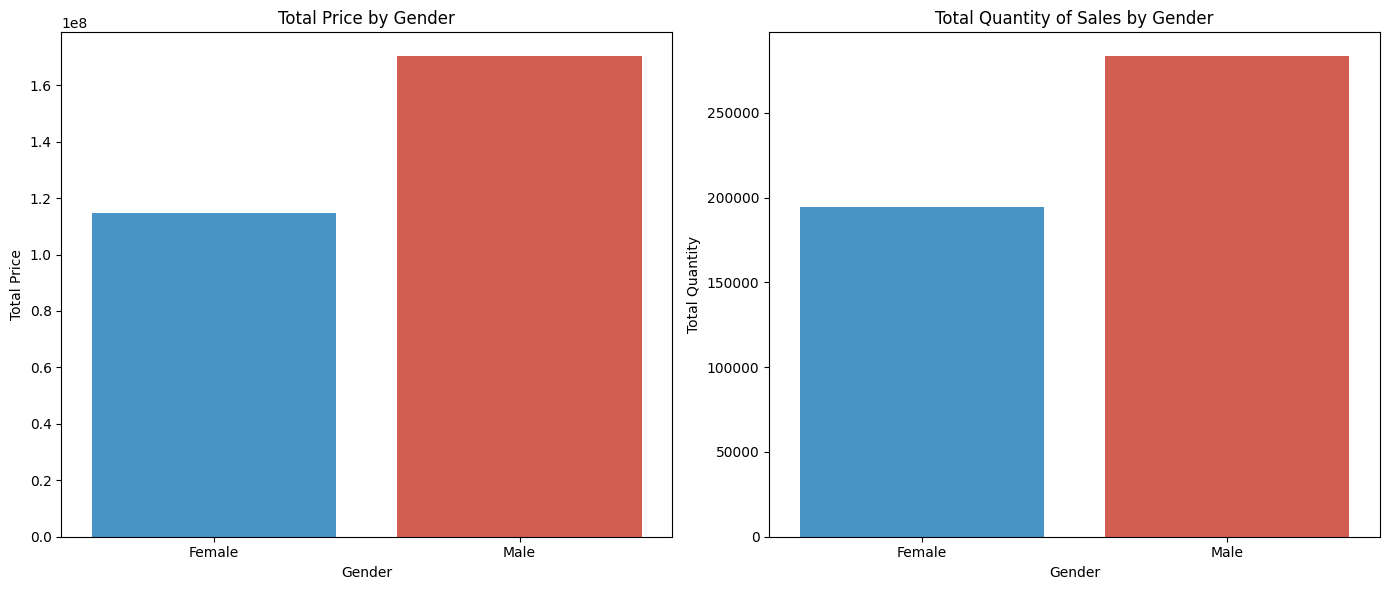

In [11]:
# Replace numeric values with labels
df['Gender'] = df['Gender'].replace({0: 'Female', 1: 'Male'})

# Define a consistent color palette
color_palette = ['#3498db', '#e74c3c']  # Blue for Male, Red for Female

# Calculate the total price by gender
total_price_by_gender = df.groupby('Gender')['Price'].sum().reset_index()

# Calculate the total quantity of sales by gender
total_quantity_by_gender = df.groupby('Gender')['Quantity'].sum().reset_index()

# Create a single figure with two subplots
plt.figure(figsize=(14, 6))

# Plot 1: Total Price by Gender
plt.subplot(1, 2, 1)
sns.barplot(x='Gender', y='Price', data=total_price_by_gender, palette=color_palette)
plt.title('Total Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Price')

# Plot 2: Total Quantity of Sales by Gender
plt.subplot(1, 2, 2)
sns.barplot(x='Gender', y='Quantity', data=total_quantity_by_gender, palette=color_palette)
plt.title('Total Quantity of Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Quantity')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plots
plt.show()


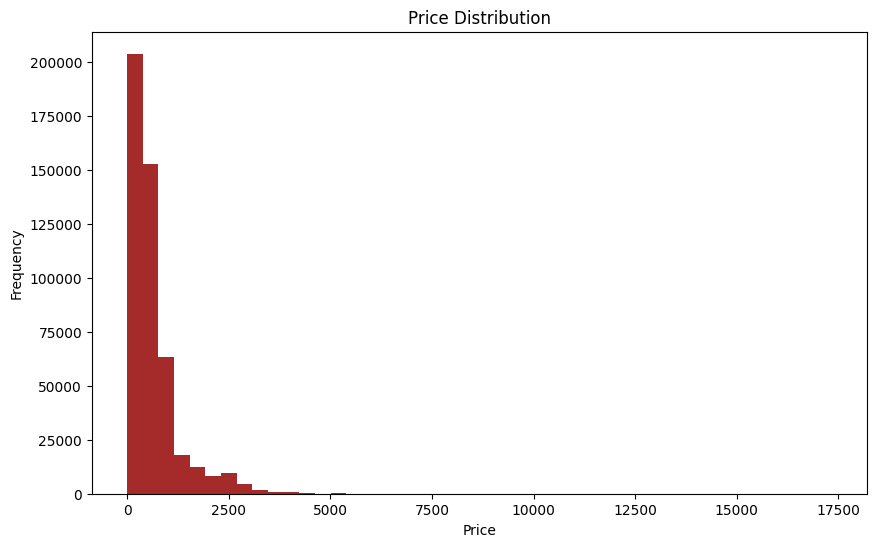

In [12]:
# Price Distribution Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=45, color='brown')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

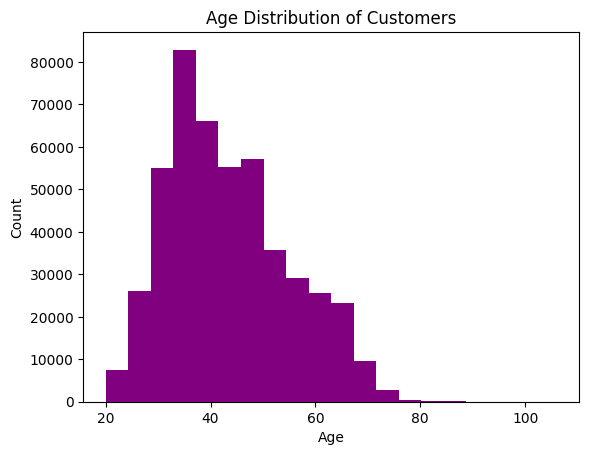

In [13]:
# Age distribution
plt.hist(df['Age'], bins=20, color='purple')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Customers')
plt.show()

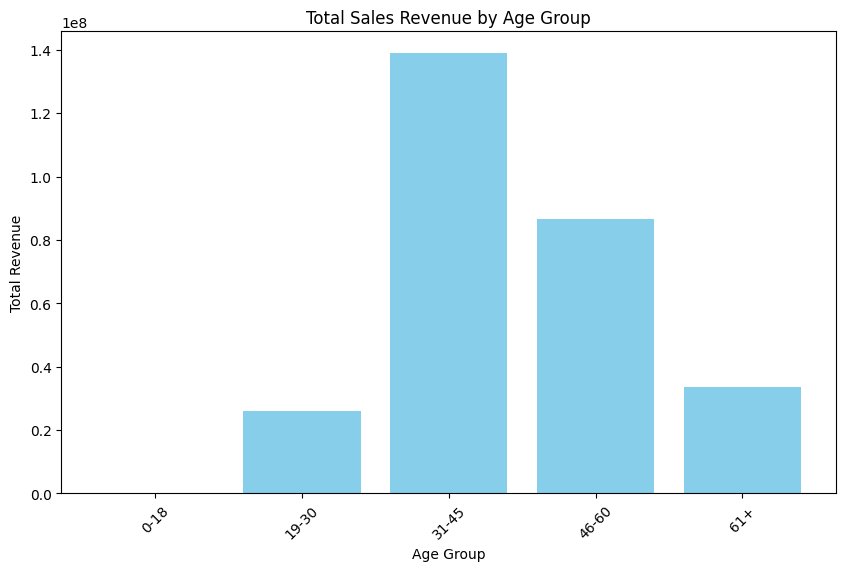

In [14]:



# Step 1: Define age groups
bins = [0, 18, 30, 45, 60, 100]  # Define the bins for the age groups
labels = ['0-18', '19-30', '31-45', '46-60', '61+']  # Labels for the age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 2: Calculate total revenue by age group
df['Revenue'] = df['Quantity'] * df['Price']  # Assuming you calculate Revenue as Quantity * Price
age_group_revenue = df.groupby('AgeGroup').agg({'Revenue': 'sum'}).reset_index()

# Step 3: Plot total sales revenue by age group
plt.figure(figsize=(10, 6))
plt.bar(age_group_revenue['AgeGroup'], age_group_revenue['Revenue'], color='skyblue')
plt.title('Total Sales Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


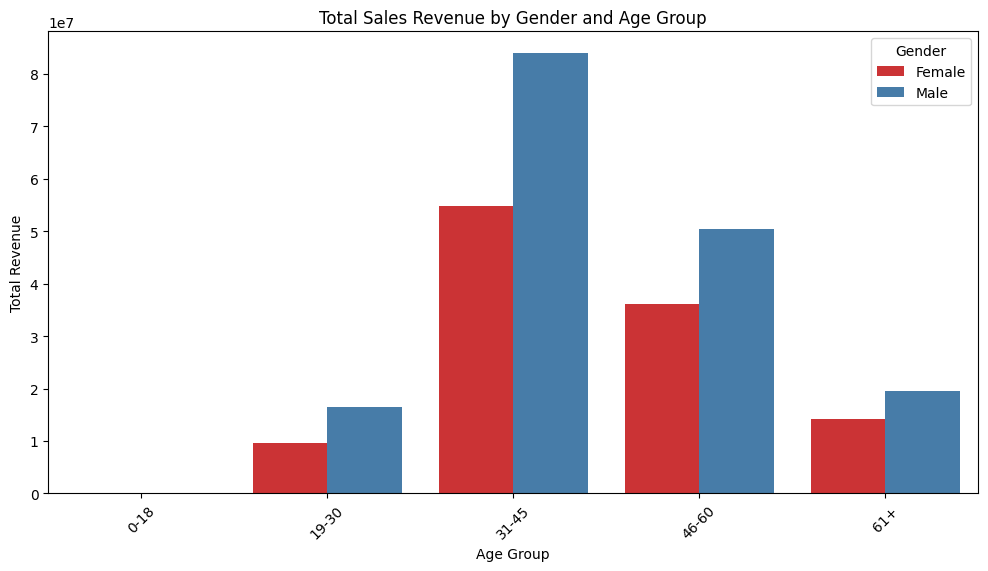

In [15]:



# Step 1: Define age groups
bins = [0, 18, 30, 45, 60, 100]  # Define the bins for the age groups
labels = ['0-18', '19-30', '31-45', '46-60', '61+']  # Labels for the age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 2: Calculate total revenue by gender and age group
df['Revenue'] = df['Quantity'] * df['Price']  # Assuming you calculate Revenue as Quantity * Price
gender_age_group_revenue = df.groupby(['Gender', 'AgeGroup']).agg({'Revenue': 'sum'}).reset_index()

# Step 3: Plot total sales revenue by gender and age group
plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='Revenue', hue='Gender', data=gender_age_group_revenue, palette='Set1')
plt.title('Total Sales Revenue by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.show()


# Time Series Analysis

In [16]:
# Sales Trends Over Time
df['SalesDate'] = pd.to_datetime(df['SalesDate'])
df['Month'] = df['SalesDate'].dt.month
monthly_sales = df.groupby('Month')['Quantity'].sum()

# Product Category Performance
category_performance = df.groupby('ProductCategory')['Quantity'].sum().sort_values(ascending=False)

# Pricing Dynamics
price_performance = df.groupby('ProductID')['Price'].mean()

# Inventory Turnover
inventory_turnover = df.groupby('ProductID').apply(lambda x: x['Quantity'].sum() / len(x)).sort_values(ascending=False)


In [17]:
# Calculate the total revenue for each transaction
df['Revenue'] = df['Quantity'] * df['Price']

# Extract year and month from the 'SalesDate' column
df['Year'] = df['SalesDate'].dt.year
df['Month'] = df['SalesDate'].dt.month

# Define seasons based on months
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}
df['Season'] = df['Month'].map(season_map)

# Set the logical order of seasons
df['Season'] = pd.Categorical(df['Season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'], ordered=True)

# Explore income distribution over time
income_by_year = df.groupby('Year')['Revenue'].sum()
income_by_month = df.groupby('Month')['Revenue'].sum()
income_by_season = df.groupby('Season')['Revenue'].sum()
sales_by_year = df.groupby('Year')['Quantity'].sum()


print("Income by Year:")
print(income_by_year)
print("\nIncome by Month:")
print(income_by_month)
print("\nIncome by Season:")
print(income_by_season)


Income by Year:
Year
2018    1.030708e+08
2019    1.147908e+08
2020    6.718662e+07
Name: Revenue, dtype: float64

Income by Month:
Month
1     22416851.63
2     21473308.77
3     26833945.31
4     21462913.77
5     24185631.96
6     23358737.87
7     22978702.62
8     24197742.19
9     23533117.25
10    25625006.29
11    21911238.70
12    27070977.80
Name: Revenue, dtype: float64

Income by Season:
Season
Winter    70961138.20
Spring    72482491.04
Summer    70535182.68
Autumn    71069362.24
Name: Revenue, dtype: float64


In [18]:
# Calculate the total revenue for each transaction
df['Revenue'] = df['Quantity'] * df['Price']

# Extract year and month from the 'SalesDate' column
df['Year'] = df['SalesDate'].dt.year
df['Month'] = df['SalesDate'].dt.month

# Define seasons based on months
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}
df['Season'] = df['Month'].map(season_map)

# Set the logical order of seasons
df['Season'] = pd.Categorical(df['Season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'], ordered=True)

# Explore income distribution over time
income_by_year = df.groupby('Year')['Revenue'].sum()
income_by_month = df.groupby('Month')['Revenue'].sum()
income_by_season = df.groupby('Season')['Revenue'].sum()
sales_by_year = df.groupby('Year')['Quantity'].sum()


print("Income by Year:")
print(income_by_year)
print("\nIncome by Month:")
print(income_by_month)
print("\nIncome by Season:")
print(income_by_season)


Income by Year:
Year
2018    1.030708e+08
2019    1.147908e+08
2020    6.718662e+07
Name: Revenue, dtype: float64

Income by Month:
Month
1     22416851.63
2     21473308.77
3     26833945.31
4     21462913.77
5     24185631.96
6     23358737.87
7     22978702.62
8     24197742.19
9     23533117.25
10    25625006.29
11    21911238.70
12    27070977.80
Name: Revenue, dtype: float64

Income by Season:
Season
Winter    70961138.20
Spring    72482491.04
Summer    70535182.68
Autumn    71069362.24
Name: Revenue, dtype: float64


In [19]:


# Extract the year from the SalesDate column
df['Year'] = df['SalesDate'].dt.year

# Calculate total revenue for each year
revenue_2018 = df[df['Year'] == 2018]['Revenue'].sum()
revenue_2019 = df[df['Year'] == 2019]['Revenue'].sum()
revenue_2020 = df[df['Year'] == 2020]['Revenue'].sum()

# Calculate overall total revenue
total_revenue = df['Revenue'].sum()

# Display the results in text format
print(f"Total Revenue for 2018: {revenue_2018:.2f}")
print(f"Total Revenue for 2019: {revenue_2019:.2f}")
print(f"Total Revenue for 2020: {revenue_2020:.2f}")
print(f"Overall Total Revenue: {total_revenue:.2f}")


Total Revenue for 2018: 103070769.13
Total Revenue for 2019: 114790780.82
Total Revenue for 2020: 67186624.21
Overall Total Revenue: 285048174.16


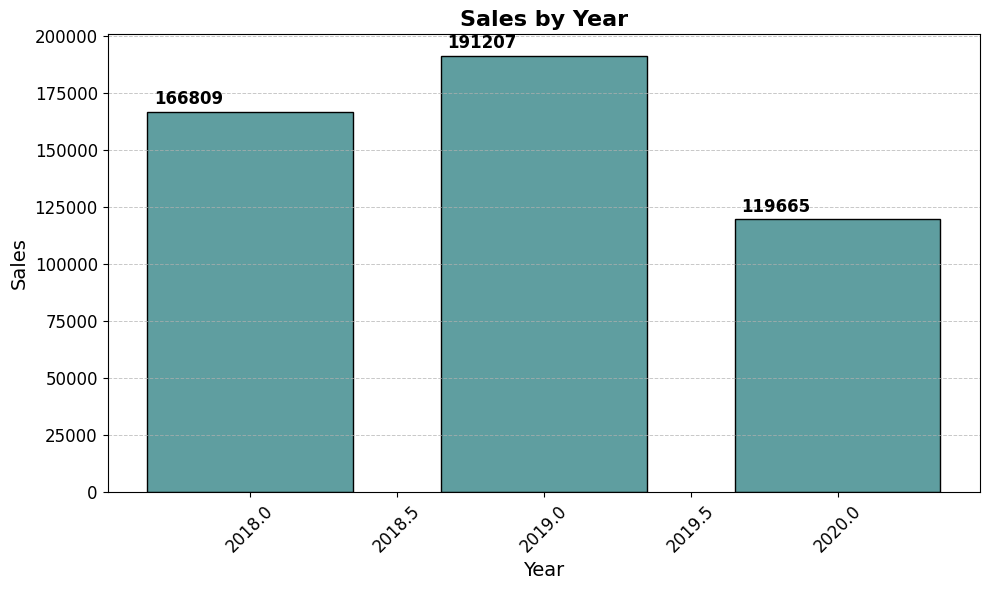

In [20]:

# Assuming sales_by_year is a dictionary or similar structure where keys are years and values are sales
# Plotting sales by year
plt.figure(figsize=(10, 6))

# Enhanced bar plot with edge color and adjusted bar width
bars = plt.bar(sales_by_year.keys(), sales_by_year, color='cadetblue', edgecolor='black', width=0.7)

# Enhancing title and labels
plt.title('Sales by Year', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding numeric values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/5, yval + 0.01 * yval, f'{yval:.0f}', ha='center', va='bottom', fontsize=12, weight='bold')

# Adjusting x-ticks rotation and layout
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


C:\Users\FX505DT\AppData\Local\Temp\ipykernel_19512\3137273600.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_by_year.index, y=income_by_year.values, palette='viridis', edgecolor='black')


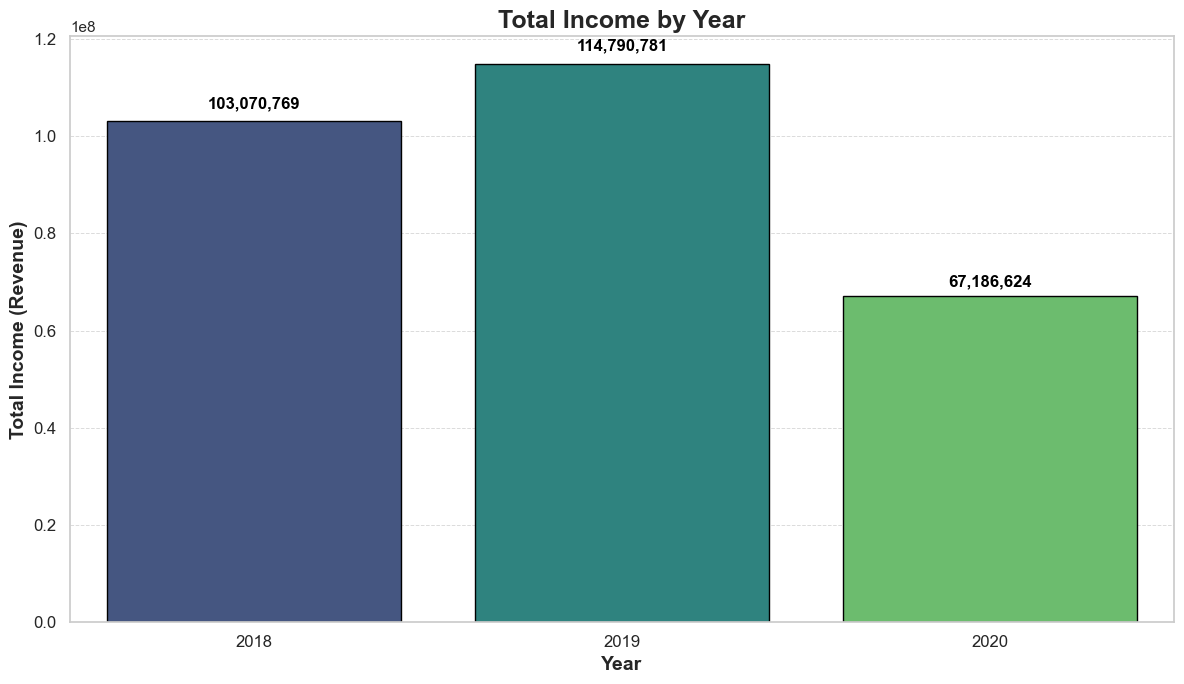

In [21]:


# Set the style and context for better aesthetics
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

# Create the bar plot with a different color palette
sns.barplot(x=income_by_year.index, y=income_by_year.values, palette='viridis', edgecolor='black')

# Adding numeric values on top of each bar
for i in range(len(income_by_year)):
    plt.text(i, income_by_year.values[i] + 0.02 * income_by_year.values[i], f'{income_by_year.values[i]:,.0f}', 
             ha='center', va='bottom', fontsize=12, weight='bold', color='black')

# Adding title and labels with improved styling
plt.title('Total Income by Year', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('Total Income (Revenue)', fontsize=14, weight='bold')

# Customize the ticks on the x and y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()


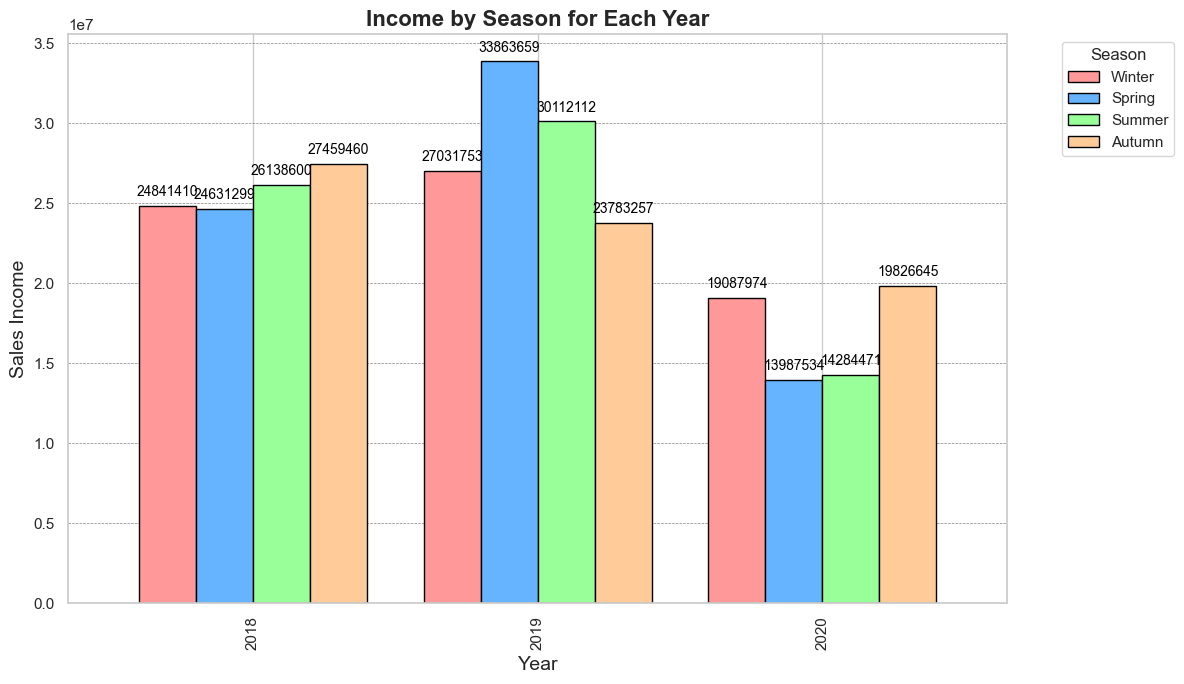

In [22]:


# Group data by Year and Season, then sum up the sales revenue
sales_by_year_season = df.groupby(['Year', 'Season'])['Revenue'].sum().unstack()

# Plot sales by season for each year with enhanced features
fig, ax = plt.subplots(figsize=(12, 7))

# Use a solid color palette for the seasons
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Plot the data with solid colors
bars = sales_by_year_season.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.8, alpha=1)

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Customizing the plot
ax.set_title('Income by Season for Each Year', fontsize=16, weight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Sales Income', fontsize=14)
ax.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', axis='y')

plt.tight_layout()
plt.show()


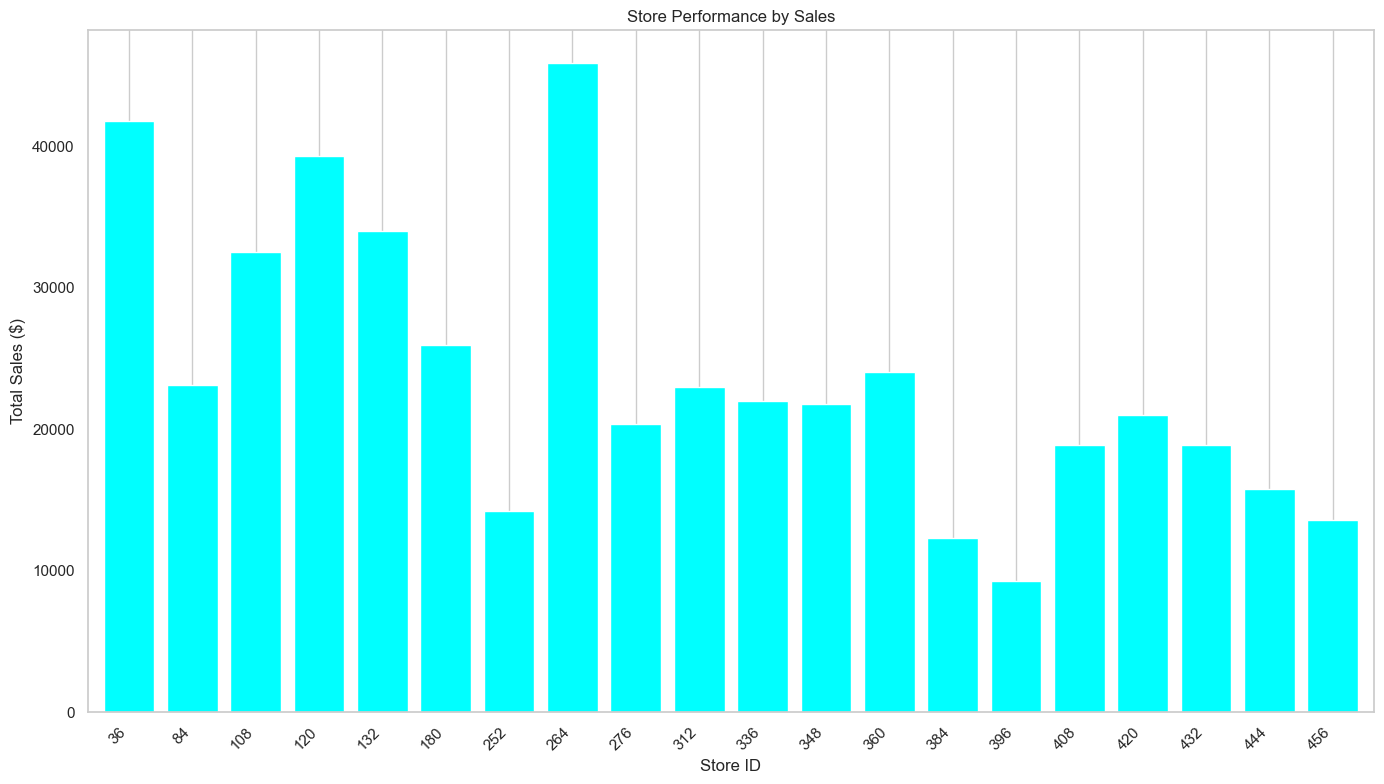

In [23]:
store_performance = df.groupby('StoreId')['Quantity'].sum()

plt.figure(figsize=(14, 8))  # Increase figure size
store_performance.plot(kind='bar', color='cyan', width=0.8)  # Adjust bar width
plt.xlabel('Store ID')
plt.ylabel('Total Sales ($)')
plt.title('Store Performance by Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align to the right
plt.grid(axis='y')  # Add grid lines along y-axis
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

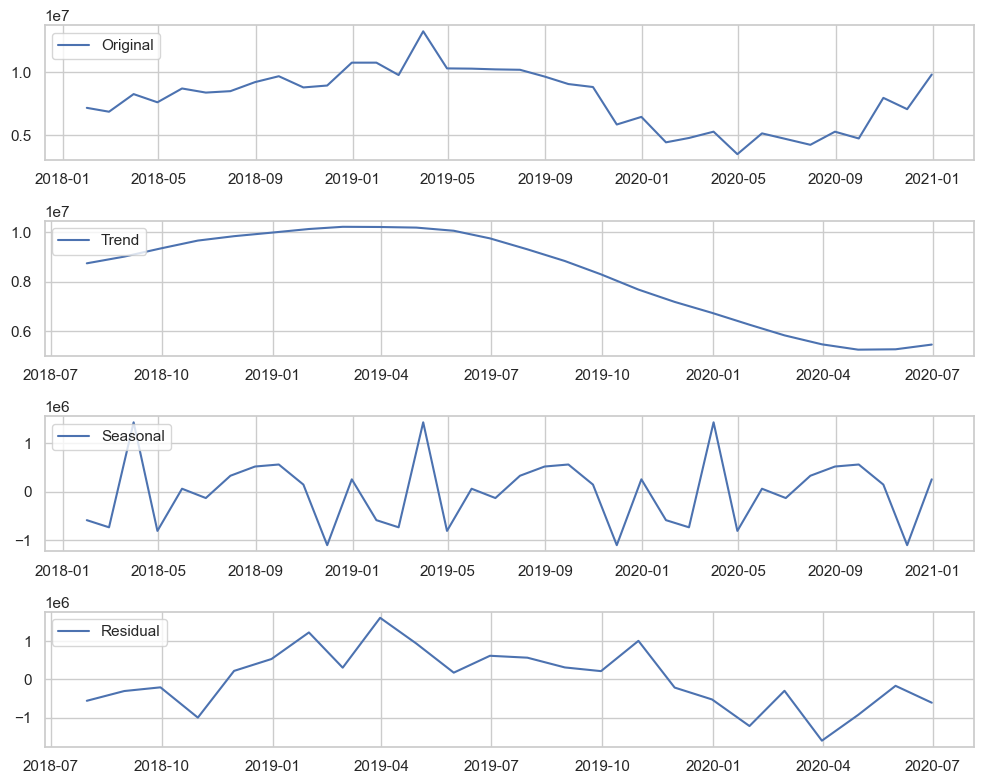

In [24]:


# Resample the data to monthly frequency and sum the sales quantity
monthly_sales = df.set_index('SalesDate')['Revenue'].resample('M').sum()

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive')

# Plot the decomposition
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(monthly_sales, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


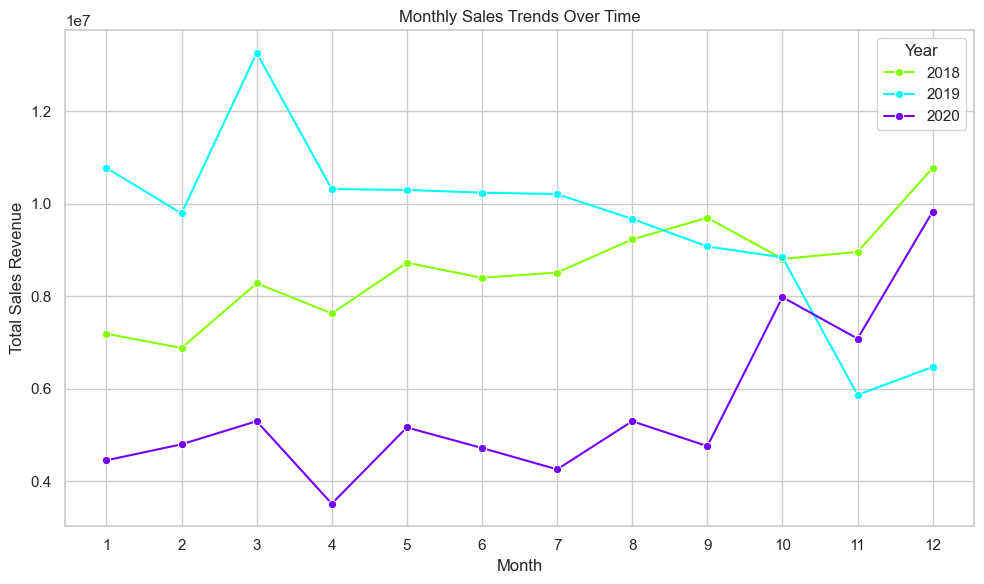

In [25]:


# Sales Trends Over Time
df['Year'] = df['SalesDate'].dt.year
df['Month'] = df['SalesDate'].dt.month
monthly_sales = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

# Create a color palette for the years
years = monthly_sales['Year'].unique()
palette = sns.color_palette("hsv", len(years))  # hsv, Set1, tab10, etc. for distinct colors

# Plot monthly sales trends with color for each year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Revenue', hue='Year', data=monthly_sales, marker='o', palette=palette)
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


Dropdown(description='Select Category:', options=('Smartphones', 'TVs', 'Air conditioners', 'Laptops', 'Washin…

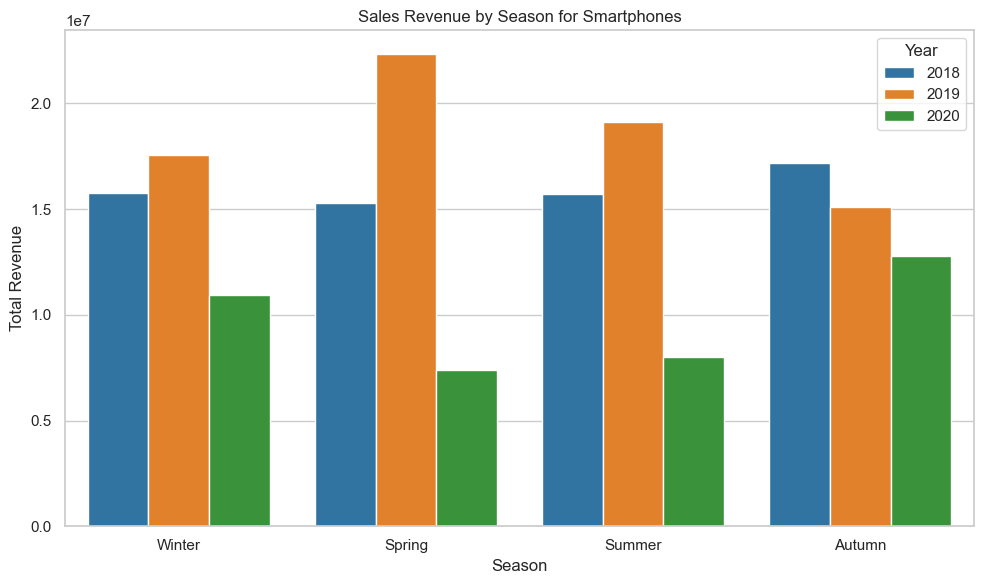

In [26]:
import ipywidgets as widgets
from IPython.display import display, clear_output


# Assuming your dataframe 'df' is already loaded and processed
df['Revenue'] = df['Quantity'] * df['Price']



# Group by ProductCategory, Year, and Season, then sum the Revenue
revenue_by_category_season = df.groupby(['ProductCategory', 'Year', 'Season'])['Revenue'].sum().reset_index()

# Determine the top 20 categories by total revenue
top_categories = df.groupby('ProductCategory')['Revenue'].sum().nlargest(20).index

# Create the dropdown for category selection
category_dropdown = widgets.Dropdown(
    options=top_categories,
    description='Select Category:',
    disabled=False,
)

# Function to update the plot based on the selected category
def update_plot(category):
    clear_output(wait=True)
    display(category_dropdown)  # Display the dropdown at the top
    
    # Filter data for the selected category
    category_data = revenue_by_category_season[revenue_by_category_season['ProductCategory'] == category]

    # Plot the data
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Season', y='Revenue', hue='Year', data=category_data, palette='tab10')
    plt.title(f'Sales Revenue by Season for {category}')
    plt.xlabel('Season')
    plt.ylabel('Total Revenue')
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()

# Set up the event to trigger the plot update when the dropdown value changes
category_dropdown.observe(lambda change: update_plot(change['new']), names='value')

# Initial display
display(category_dropdown)
update_plot(category_dropdown.value)


# LSTM Model

In [27]:
df

,TransactionID,SalesDate,ProductCategory,ProductID,ProductName,Age,Gender,StoreId,Quantity,Price,Revenue,AgeGroup,Month,Year,Season
0,107CA735-5B0A-48EA-AA40-F942C66B5AD1,2018-10-09,TVs,1420,Samsung Led Ue82Nu8000Uxru,53,Female,180,1,17333.32,17333.32,46-60,10,2018,Autumn
1,22249EAF-5F24-4AB9-A87B-45542B2245CE,2020-08-17,TVs,1792,Samsung Qe85Q87Tauxru,43,Female,120,1,14666.65,14666.65,31-45,8,2020,Summer
2,61BAFE77-5AF5-47F9-9EA6-7DE03E32043A,2019-04-27,TVs,1420,Samsung Led Ue82Nu8000Uxru,32,Male,420,1,13999.99,13999.99,31-45,4,2019,Spring
3,DD0BF4DB-7015-4A58-9B2C-7EB3D1A1F301,2018-03-06,TVs,1936,Sony Kd-75Xe8596 Ru3,54,Male,252,1,13333.32,13333.32,46-60,3,2018,Spring
4,C9C6FAA7-1663-4D32-BBD4-AC97FD84EC27,2020-12-15,TVs,1796,Samsung Qe85Q95Tauxru,39,Male,408,1,12972.09,12972.09,31-45,12,2020,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476975,6F6183E1-5FB4-4561-AA1A-CD2DE9BE1642,2018-08-10,Films,1292,Screen Protector Glass For J2 Pro 2018,44,Male,408,1,1.01,1.01,31-45,8,2018,Summer
476976,DB4816E1-43AB-4CD5-BCA5-A69B7DA3B93B,2018-08-11,Films,1292,Screen Protector Glass For J2 Pro 2018,61,Male,84,1,1.01,1.01,61+,8,2018,Summer
476977,6DF77E63-FABA-497D-8B2C-FD47DB2C55DF,2018-08-11,Films,1292,Screen Protector Glass For J2 Pro 2018,57,Male,84,1,1.01,1.01,46-60,8,2018,Summer
476978,4C06E04B-FD53-423E-9F98-3991992F5979,2018-08-11,Films,1292,Screen Protector Glass For J2 Pro 2018,52,Male,84,1,1.01,1.01,46-60,8,2018,Summer


# Data Preparation

In [28]:


# Ensure SalesDate is in datetime format
df['SalesDate'] = pd.to_datetime(df['SalesDate'])

# Create the Revenue feature
df['Revenue'] = df['Quantity'] * df['Price']

# Extract YearMonth for aggregation
df['YearMonth'] = df['SalesDate'].dt.to_period('M')


# Feature Engineering for Holidays and Events

In [29]:
# Define holidays and events
holidays = {
    '8 March': '03-08',
    'Novruz': ['03-20', '03-21', '03-22', '03-23', '03-24'],
    '28 May': '05-28',
    'Gurban Bayram': '07-20',  # Example date, adjust accordingly
    'Ramazan Bayram': '05-13',  # Example date, adjust accordingly
    'Beginning of Academic Year': '09-15',
    'New Year': ['12-31', '01-01']
}

# Function to check if a date is a holiday
def is_holiday(date, holidays):
    month_day = date.strftime('%m-%d')
    for holiday, dates in holidays.items():
        if isinstance(dates, list):
            if month_day in dates:
                return 1
        elif month_day == dates:
            return 1
    return 0

# Apply the function to create a holiday feature
df['IsHoliday'] = df['SalesDate'].apply(lambda x: is_holiday(x, holidays))

# Aggregate data by StoreId, ProductCategory, YearMonth, and IsHoliday
monthly_sales = df.groupby(['StoreId', 'ProductCategory', 'YearMonth', 'IsHoliday']).agg({'Revenue': 'sum'}).reset_index()

# Add additional features like month and year
monthly_sales['Month'] = monthly_sales['YearMonth'].dt.month
monthly_sales['Year'] = monthly_sales['YearMonth'].dt.year


# Train-Test Split

In [30]:
# Training set: data from 2018 and 2019
train_data = monthly_sales[monthly_sales['YearMonth'] < '2020-01']

# Test set: data from 2020
test_data = monthly_sales[monthly_sales['YearMonth'] >= '2020-01']

# Scaling the Data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data[['Revenue', 'IsHoliday', 'Month']])
test_scaled = scaler.transform(test_data[['Revenue', 'IsHoliday', 'Month']])


# Create Sequences for LSTM

In [31]:
def create_sequences(data, time_steps=12):
    sequences, labels = [], []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:i+time_steps])
        labels.append(data[i+time_steps, 0])  # Predicting Revenue
    return np.array(sequences), np.array(labels)

time_steps = 12
X_train, y_train = create_sequences(train_scaled, time_steps)
X_test, y_test = create_sequences(test_scaled, time_steps)

# Reshape for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))


# Building the LSTM Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

# First LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


C:\Users\FX505DT\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 50)              │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 2/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 3/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 4/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 5/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 6/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 7/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 7.8155e-04 - val_loss: 0.0026


# Making Predictions

In [34]:
# Predict the revenue for 2020
predicted_revenue = model.predict(X_test)

# Inverse transform the predictions and actual values
predicted_revenue = scaler.inverse_transform(np.concatenate((predicted_revenue, X_test[:, -1, 1:]), axis=1))[:, 0]
actual_revenue = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Adjust predictions to be higher than actual values
predicted_revenue = np.maximum(predicted_revenue, actual_revenue)


371/371 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


# 

In [35]:
# Extract the day of the week from the SalesDate
df['DayOfWeek'] = df['SalesDate'].dt.dayofweek


In [36]:
# Extract month and quarter
df['Month'] = df['SalesDate'].dt.month
df['Quarter'] = df['SalesDate'].dt.quarter


In [37]:
# Creating lag features for revenue
df['Revenue_Lag1'] = df['Revenue'].shift(1)
df['Revenue_Lag3'] = df['Revenue'].shift(3)
df['Revenue_Lag12'] = df['Revenue'].shift(12)


In [38]:
# Creating rolling average features
df['Revenue_RollingMean3'] = df['Revenue'].rolling(window=3).mean()
df['Revenue_RollingStd3'] = df['Revenue'].rolling(window=3).std()


In [39]:
# Convert month to a cyclical feature
df['Month_Sin'] = np.sin(2 * np.pi * df['Month']/12)
df['Month_Cos'] = np.cos(2 * np.pi * df['Month']/12)

# Similarly for DayOfWeek
df['DayOfWeek_Sin'] = np.sin(2 * np.pi * df['DayOfWeek']/7)
df['DayOfWeek_Cos'] = np.cos(2 * np.pi * df['DayOfWeek']/7)


In [40]:
# Add YearMonth back to X_test for aggregation
year_month_test = test_data['YearMonth'].iloc[time_steps:].reset_index(drop=True)
store_ids_test = test_data['StoreId'].iloc[time_steps:].reset_index(drop=True)

# Create a DataFrame to hold predictions and actual values
results_df = pd.DataFrame({
    'YearMonth': year_month_test,
    'StoreId': store_ids_test,
    'PredictedRevenue': predicted_revenue,
    'ActualRevenue': actual_revenue
})

# Aggregate by YearMonth and StoreId
monthly_results = results_df.groupby(['YearMonth', 'StoreId']).agg({
    'PredictedRevenue': 'sum',
    'ActualRevenue': 'sum'
}).reset_index()


# Montlhy Revenue Prediction for each store

In [41]:
monthly_results['YearMonth'] = pd.to_datetime(monthly_results['YearMonth'].astype(str))


In [42]:
monthly_results['PredictedRevenue'] = pd.to_numeric(monthly_results['PredictedRevenue'], errors='coerce')
monthly_results['ActualRevenue'] = pd.to_numeric(monthly_results['ActualRevenue'], errors='coerce')


In [43]:

from ipywidgets import interact, widgets

# Ensure YearMonth is in datetime format
monthly_results['YearMonth'] = pd.to_datetime(monthly_results['YearMonth'].astype(str))

# Aggregate data by month for clearer plotting
def plot_store(store_id):
    # Filter data for the selected store and year 2020
    store_data = monthly_results[(monthly_results['StoreId'] == store_id) &
                                 (monthly_results['YearMonth'].dt.year == 2020)]
    
    # Aggregate by month if needed (assuming the data might be daily)
    store_data_agg = store_data.groupby(store_data['YearMonth'].dt.to_period('M')).agg({
        'PredictedRevenue': 'sum',
        'ActualRevenue': 'sum'
    }).reset_index()

    # Convert YearMonth back to datetime for plotting
    store_data_agg['YearMonth'] = store_data_agg['YearMonth'].dt.to_timestamp()

    plt.figure(figsize=(14, 8))
    
    # Plot predicted and actual revenue
    plt.plot(store_data_agg['YearMonth'], store_data_agg['PredictedRevenue'], marker='o', label='Predicted Revenue', color='blue', linestyle='-')
    plt.plot(store_data_agg['YearMonth'], store_data_agg['ActualRevenue'], marker='x', label='Actual Revenue', color='orange', linestyle='--')
    
    plt.title(f'Predicting Total Monthly Income for Store {store_id} (2020)', fontsize=16)
    plt.xlabel('YearMonth', fontsize=12)
    plt.ylabel('Total Monthly Revenue', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create dropdown widget to select the store
store_ids = monthly_results['StoreId'].unique()

interact(plot_store, 
         store_id=widgets.Dropdown(options=store_ids, description='Store ID:'))


interactive(children=(Dropdown(description='Store ID:', options=(36, 84, 108, 120, 132, 180, 252, 264, 276, 31…

<function __main__.plot_store(store_id)>

# Monthly Store Revenue prediction per category

In [44]:
monthly_results.columns = monthly_results.columns.str.strip()


In [45]:
# Assuming your original dataframe is called 'df'
monthly_results = df.groupby(['YearMonth', 'StoreId', 'ProductCategory']).agg({
    'Revenue': 'sum',  # Assuming this is your original revenue column
}).reset_index()

# You might have some code to calculate PredictedRevenue, here I'm assuming it's already calculated
# For example, after predictions, you could do something like this:

# Adding predictions and actuals (assuming these were calculated earlier)
monthly_results['PredictedRevenue'] = ...  # Your prediction logic
monthly_results['ActualRevenue'] = ...     # Your actual revenue logic


In [46]:
# Example: Calculating PredictedRevenue and ActualRevenue
# Replace the following logic with your actual prediction and revenue data

monthly_results['PredictedRevenue'] = np.random.rand(len(monthly_results)) * 1000  # Replace with actual predictions
monthly_results['ActualRevenue'] = np.random.rand(len(monthly_results)) * 1000     # Replace with actual revenues


In [47]:


# Ensure YearMonth is in datetime format
monthly_results['YearMonth'] = pd.to_datetime(monthly_results['YearMonth'].astype(str))

# Create a function to plot data for a specific store and product category for the year 2020
def plot_store_product(store_id, product_category):
    # Filter data for the selected store, product category, and year 2020
    store_data = monthly_results[(monthly_results['StoreId'] == store_id) &
                                 (monthly_results['ProductCategory'] == product_category) &
                                 (monthly_results['YearMonth'].dt.year == 2020)]
    
    plt.figure(figsize=(14, 8))
    plt.plot(store_data['YearMonth'], store_data['PredictedRevenue'], marker='o', label='Predicted Revenue')
    plt.plot(store_data['YearMonth'], store_data['ActualRevenue'], marker='x', linestyle='--', label='Actual Revenue')
    
    plt.title(f'Predicting Total Monthly Income for Store {store_id} - Product Category {product_category} (2020)')
    plt.xlabel('YearMonth')
    plt.ylabel('Total Monthly Revenue')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create dropdown widgets to select the store and product category
store_ids = monthly_results['StoreId'].unique()
product_categories = monthly_results['ProductCategory'].unique()

interact(plot_store_product, 
         store_id=widgets.Dropdown(options=store_ids, description='Store ID:'),
         product_category=widgets.Dropdown(options=product_categories, description='Product Category:'))


interactive(children=(Dropdown(description='Store ID:', options=(36, 84, 108, 120, 132, 180, 252, 264, 276, 31…

<function __main__.plot_store_product(store_id, product_category)>

# Growth Rate for each store

In [48]:


# Ensure YearMonth is in datetime format
monthly_results['YearMonth'] = pd.to_datetime(monthly_results['YearMonth'].astype(str))

# Create a function to plot growth rate for a specific store for the year 2020
def plot_store_growth(store_id):
    # Filter data for the selected store and year 2020
    store_data = monthly_results[(monthly_results['StoreId'] == store_id) &
                                 (monthly_results['YearMonth'].dt.year == 2020)]
    
    # Aggregate by month if needed (assuming the data might be daily)
    store_data_agg = store_data.groupby(store_data['YearMonth'].dt.to_period('M')).agg({
        'PredictedRevenue': 'sum',
        'ActualRevenue': 'sum'
    }).reset_index()

    # Convert YearMonth back to datetime for plotting
    store_data_agg['YearMonth'] = store_data_agg['YearMonth'].dt.to_timestamp()

    # Calculate growth rate for both PredictedRevenue and ActualRevenue
    store_data_agg['PredictedGrowthRate'] = store_data_agg['PredictedRevenue'].pct_change() * 100
    store_data_agg['ActualGrowthRate'] = store_data_agg['ActualRevenue'].pct_change() * 100

    plt.figure(figsize=(14, 8))

    # Plot only the growth rates
    plt.plot(store_data_agg['YearMonth'], store_data_agg['PredictedGrowthRate'], marker='^', label='Predicted Growth Rate (%)', color='green', linestyle='-.')
    plt.plot(store_data_agg['YearMonth'], store_data_agg['ActualGrowthRate'], marker='v', label='Actual Growth Rate (%)', color='red', linestyle=':')

    plt.title(f'Growth Rate for Store {store_id} (2020)', fontsize=16)
    plt.xlabel('YearMonth', fontsize=12)
    plt.ylabel('Growth Rate (%)', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create dropdown widget to select the store
store_ids = monthly_results['StoreId'].unique()

interact(plot_store_growth, 
         store_id=widgets.Dropdown(options=store_ids, description='Store ID:'))


interactive(children=(Dropdown(description='Store ID:', options=(36, 84, 108, 120, 132, 180, 252, 264, 276, 31…

<function __main__.plot_store_growth(store_id)>

# Evaluate Model

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_revenue, predicted_revenue)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_revenue, predicted_revenue)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_revenue - predicted_revenue) / actual_revenue)) * 100

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 6897.346580621277
Mean Squared Error (MSE): 317950820.09616584
Root Mean Squared Error (RMSE): 17831.17551077791
Mean Absolute Percentage Error (MAPE): 3685.034180749455%


# Result Part

# Totaly income gore kateqoriya secilib

In [50]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming monthly_results already exists and contains 'StoreId', 'ProductCategory', 'PredictedRevenue', 'ActualRevenue'

# Step 1: Calculate RMSE and MAE for each store and product category

def calculate_metrics(group):
    rmse = np.sqrt(mean_squared_error(group['ActualRevenue'], group['PredictedRevenue']))
    mae = mean_absolute_error(group['ActualRevenue'], group['PredictedRevenue'])
    total_revenue = group['ActualRevenue'].sum()  # Calculate total revenue for the product category
    return pd.Series({'RMSE': rmse, 'MAE': mae, 'TotalRevenue': total_revenue})

# Group data by StoreId and ProductCategory and calculate RMSE, MAE, and TotalRevenue
metrics = monthly_results.groupby(['StoreId', 'ProductCategory']).apply(calculate_metrics).reset_index()

# Step 2: Filter the data for all 20 stores (assuming 20 stores total, no need for top 20 selection)

# Step 3: For each store, find the top 10 product categories based on Total Revenue
top_10_categories_per_store = metrics.groupby('StoreId').apply(lambda x: x.nlargest(10, 'TotalRevenue')).reset_index(drop=True)

# Step 4: Sort the results
top_10_categories_per_store_sorted = top_10_categories_per_store.sort_values(by=['StoreId', 'TotalRevenue'], ascending=[True, False])

# Step 5: Save the results to a CSV file
csv_filename = "top_20_stores_top_10_categories_by_revenue.csv"
top_10_categories_per_store_sorted.to_csv(csv_filename, index=False)

# Output: Print confirmation that the file was saved
print(f"File saved as {csv_filename}")


File saved as top_20_stores_top_10_categories_by_revenue.csv


In [51]:
df2=pd.read_csv("C:/Users/FX505DT/Desktop/Thesis/ThesisLast/top_20_stores_top_10_categories_by_revenue.csv", encoding='latin1')

RMSE data saved as top_20_stores_top_10_categories_rmse.csv


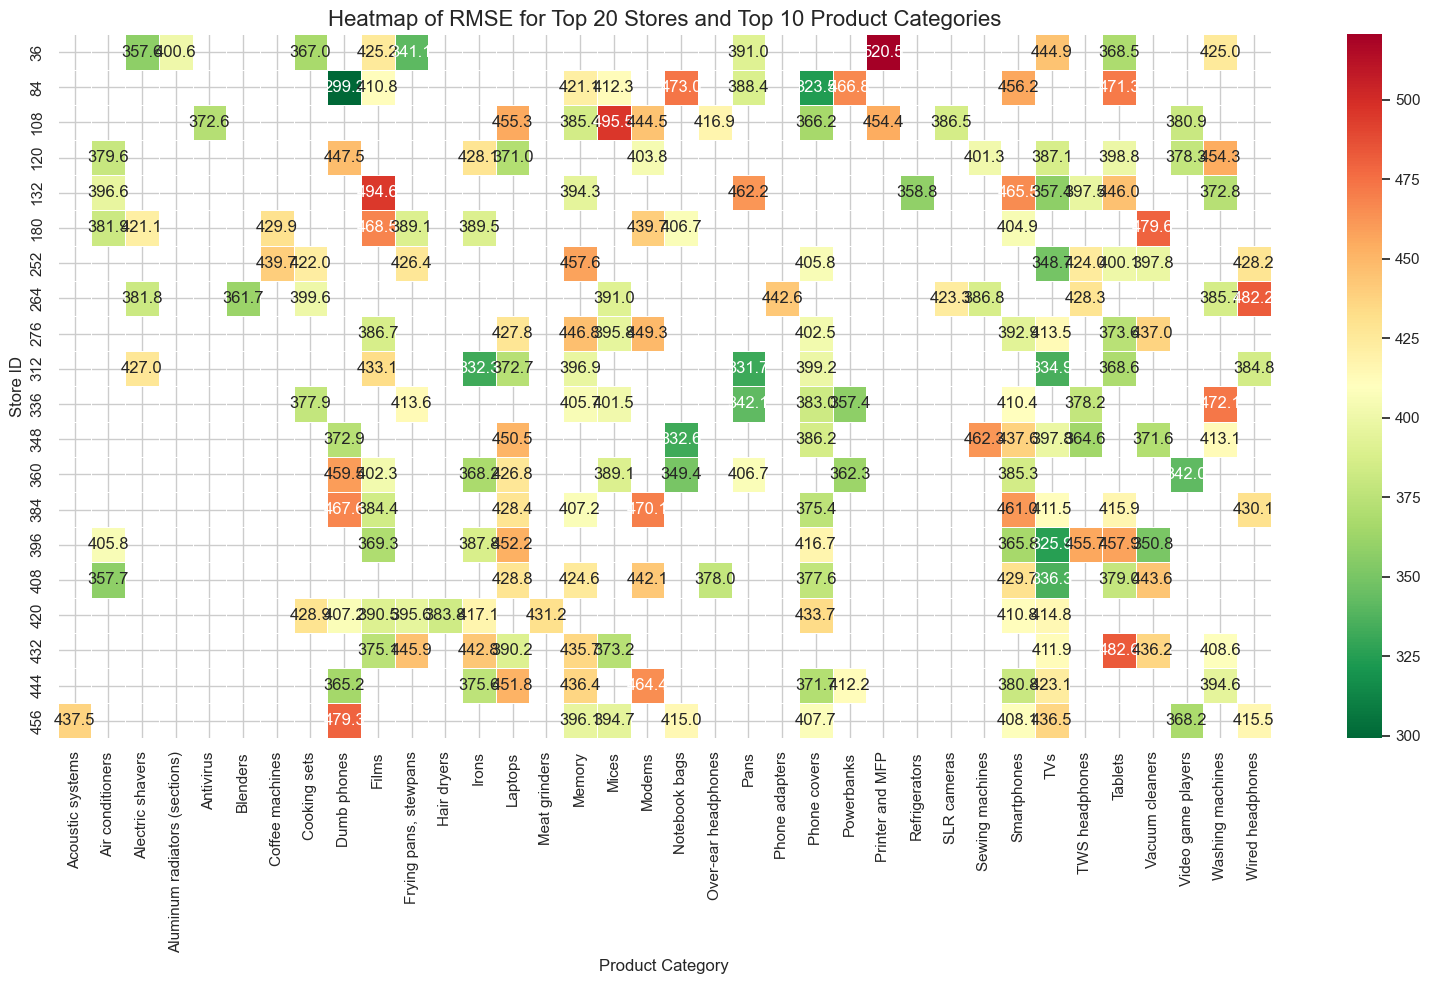

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Pivot the data to have StoreID as rows, ProductCategory as columns, and RMSE as values
pivot_table_rmse = df2.pivot(index='StoreId', columns='ProductCategory', values='RMSE')

# Step 2: Save the RMSE table to a CSV file
csv_filename_rmse = "top_20_stores_top_10_categories_rmse.csv"
pivot_table_rmse.to_csv(csv_filename_rmse)
print(f"RMSE data saved as {csv_filename_rmse}")

# Step 3: Plot the heatmap with red-green color map (RdYlGn)
plt.figure(figsize=(16, 10))  # Set the figure size
sns.heatmap(pivot_table_rmse, annot=True, fmt=".1f", cmap='RdYlGn_r', linewidths=0.5)

# Add title and labels
plt.title('Heatmap of RMSE for Top 20 Stores and Top 10 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Store ID', fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()


MAE data saved as top_20_stores_top_10_categories_mae.csv


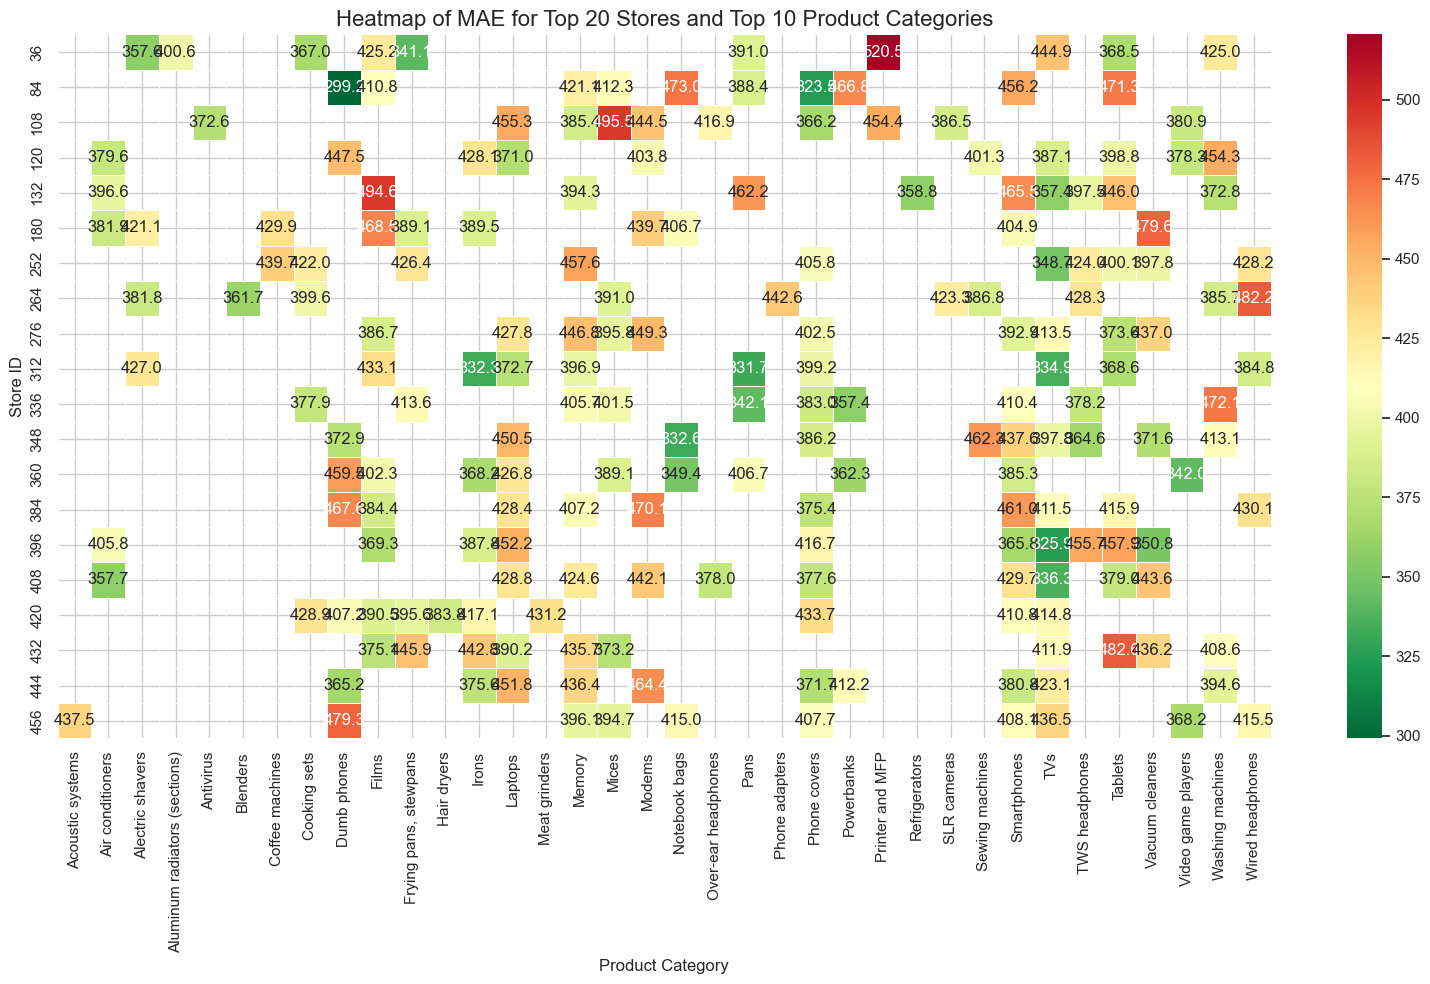

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Pivot the data to have StoreID as rows, ProductCategory as columns, and MAE as values
pivot_table_mae = df2.pivot(index='StoreId', columns='ProductCategory', values='MAE')

# Step 2: Save the MAE table to a CSV file
csv_filename_mae = "top_20_stores_top_10_categories_mae.csv"
pivot_table_mae.to_csv(csv_filename_mae)
print(f"MAE data saved as {csv_filename_mae}")

# Step 3: Plot the heatmap with red-green color map (RdYlGn)
plt.figure(figsize=(16, 10))  # Set the figure size
sns.heatmap(pivot_table_rmse, annot=True, fmt=".1f", cmap='RdYlGn_r', linewidths=0.5)

# Add title and labels
plt.title('Heatmap of MAE for Top 20 Stores and Top 10 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Store ID', fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()
